In [1]:
import json

with open('/content/fexEx.json', 'r') as f:
    data = json.load(f)

print(data)

[{'task_id': 'HumanEval/1', 'prompt': 'from typing import List\n\n\ndef separate_paren_groups(paren_string: str) -> List[str]:\n    """ Input to this function is a string containing multiple groups of nested parentheses. Your goal is to\n    separate those group into separate strings and return the list of those.\n    Separate groups are balanced (each open brace is properly closed) and not nested within each other\n    Ignore any spaces in the input string.\n    >>> separate_paren_groups(\'( ) (( )) (( )( ))\')\n    [\'()\', \'(())\', \'(()())\']\n    """\n', 'entry_point': 'separate_paren_groups', 'canonical_solution': "    result = []\n    current_string = []\n    current_depth = 0\n\n    for c in paren_string:\n        if c == '(':\n            current_depth += 1\n            current_string.append(c)\n        elif c == ')':\n            current_depth -= 1\n            current_string.append(c)\n\n            if current_depth == 0:\n                result.append(''.join(current_strin

In [3]:
!pip install -q groq
from groq import Groq
from google.colab import userdata
gr = userdata.get('groq')
client = Groq(api_key=gr)

In [4]:
def run_tests(candidate_function):
    """
    Correctly runs the HumanEval test string against a candidate function.
    """
    test_string = data[5]['test']
    # This scope will hold the functions defined in the test_string
    exec_scope = {}

    try:
        # 1. Execute the test string. This defines the 'check' function
        #    within exec_scope.
        exec(test_string, {}, exec_scope)

        # 2. Retrieve the 'check' function from the scope
        check_function = exec_scope['check']

        # 3. Now, CALL the 'check' function with our candidate.
        #    This is where the asserts are actually run.
        check_function(candidate_function)

        print("✅ All test cases passed!")

    except AssertionError as e:
        # This will catch failures from the assert statements inside 'check'
        print(f"❌ Test case failed: {e}")
    except Exception as e:
        print(f"💥 An error occurred during testing: {e}")

#Qwen

##Qwen COT

In [5]:
client = Groq(api_key=gr)
completion = client.chat.completions.create(
    model="qwen/qwen3-32b",
    messages=[
      {
        "role": "system",
        "content": """You are an expert Python programming assistant. You must solve the given coding problem step by step.

Follow this exact output structure:

**APPROACH:**
1.  **Understand the requirements:** (Analyze the problem statement, inputs, outputs, and constraints).
2.  **Analyze the examples:** (Break down the provided examples to understand edge cases).
3.  **Plan the algorithms:** (Describe the logic for three different and distinct algorithms to solve the problem).
4.  **Implement the solutions:** (Write the code for the three algorithms).

**REQUIREMENTS:**
- You must provide three (3) different and distinct code solutions.
- Implement each function using the **exact signature** (parameters and return type) from the problem prompt.
- **CRITICAL: Name your three functions `test1`, `test2`, and `test3` respectively.**
- Include all necessary imports at the top of each code block.

**--- PLAN ---**
(Your detailed plan and reasoning for all three algorithms goes here.)

**--- SOLUTIONS ---**"""
      },
      {
        "role": "user",
        "content": data[5]['prompt']
      }
    ],
    temperature=1,
    max_completion_tokens=4096,
    top_p=1,
    reasoning_effort="none",
    stream=True,
    stop=None
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")

**APPROACH:**
1. **Understand the requirements:**
   - The function is given a string with groups of parentheses separated by spaces.
   - For each group, compute the maximum level of nesting (depth of parentheses).
   - Return a list of these maximum depths in the same order as the input groups.

2. **Analyze the examples:**
   - `'(()())'` corresponds to 2 levels.
   - `'((()))'` corresponds to 3 levels.
   - `'()'` corresponds to 1 level.
   - `'((())()())'` corresponds to 3 levels because `((())` has the largest nesting.

3. **Plan the algorithms:**
   - **Algorithm 1 (Using Iteration and Stack):** Process each group in the string, track the current depth using a counter. When encountering `(`, increment the depth, and update the maximum depth. When encountering `)`, decrement the depth.
   - **Algorithm 2 (String Split and Recursion):** Split the input string into groups and define a helper function that calculates the maximum depth for each group recursively.
   - **Algorithm 3 (

Code 1

In [6]:
from typing import List
import re


def test1(paren_string: str) -> List[int]:
    """ Uses stack-based approach to calculate depth of parentheses. """
    groups = paren_string.strip().split()
    result = []
    for group in groups:
        max_depth = 0
        current_depth = 0
        for ch in group:
            if ch == '(':
                current_depth += 1
                max_depth = max(max_depth, current_depth)
            elif ch == ')':
                current_depth -= 1
        result.append(max_depth)
    return result

In [7]:
run_tests(test1)

✅ All test cases passed!


Code 2

In [8]:
def test2(paren_string: str) -> List[int]:
    """ Uses recursive approach to split the string and calculate depth. """
    def max_depth(group: str) -> int:
        if not group:
            return 0
        depth = 0
        res = 0
        for ch in group:
            if ch == '(':
                depth += 1
                res = max(res, depth)
            elif ch == ')':
                depth -= 1
        return res

    groups = paren_string.strip().split()
    return [max_depth(group) for group in groups]

In [9]:
run_tests(test2)

✅ All test cases passed!


Code 3

In [10]:
def test3(paren_string: str) -> List[int]:
    """ Uses a basic state-based method without stack or recursion. """
    groups = re.findall(r'\(+.*?\)+', paren_string)  # Extract valid groups
    result = []
    for group in groups:
        depth = 0
        max_val = 0
        for ch in group:
            if ch == '(':
                depth += 1
                max_val = max(max_val, depth)
            elif ch == ')':
                depth -= 1
        result.append(max_val)
    return result

In [11]:
run_tests(test3)

❌ Test case failed: 


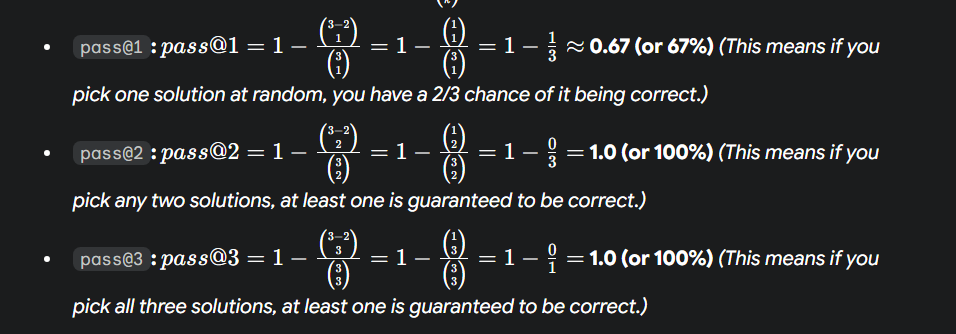

Qwen on Stepwise COT

In [12]:
client = Groq(api_key=gr)
completion = client.chat.completions.create(
    model="qwen/qwen3-32b",
    messages=[
      {
        "role": "system",
        "content": """You are an expert Python programming assistant. You must solve the given problem systematically.

Follow this exact output structure:

**SYSTEMATIC APPROACH:**
* **Step 1: Understand the requirements:** (Analyze the problem statement, inputs, outputs, and constraints).
* **Step 2: Analyze the examples:** (Break down the docstring examples to find edge cases).
* **Step 3: Plan the algorithms:** (Describe the logic for three different and distinct algorithms to solve the problem).
* **Step 4: Implement the solutions:** (Provide the final code for all three algorithms below).

**REQUIREMENTS:**
- You must provide three (3) different and distinct code solutions.
- Implement each function using the **exact signature** (parameters and return type) from the problem prompt.
- **CRITICAL: Name your three functions `test1`, `test2`, and `test3` respectively.**
- Include all necessary imports at the top of each code block.

**--- PLAN ---**
(Your detailed plan and reasoning for all three algorithms goes here.)

**--- SOLUTIONS ---**"""
      },
      {
        "role": "user",
        "content": data[5]['prompt']
      }
    ],
    temperature=1,
    max_completion_tokens=4096,
    top_p=1,
    reasoning_effort="none",
    stream=True,
    stop=None
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")

**SYSTEMATIC APPROACH:**
* **Step 1: Understand the requirements:** We are given a string of groups of nested parentheses separated by spaces. We are to calculate the maximum depth of nesting for each group and return the depths as a list in order of the groups. The function must return a list of integers representing the maximum depth for each group.
* **Step 2: Analyze the examples:** In the example, `parse_nested_parens('(()()) ((())) () ((())()())')` produces `[2, 3, 1, 3]`. Breaking it down:
    - `(()())` → the maximum nesting is 2.
    - `((()))` → the maximum nesting is 3.
    - `()` → max nesting is 1.
    - `((())()())` → nested within and grouped, max level is 3.
* **Step 3: Plan the algorithms:**
    1. **Iterative Counting Algorithm (`test1`)**:
        - For each group of parentheses, iterate character by character, incrementing a depth counter for `(` and decrementing for `)`.
        - Keep track of the maximum depth encountered during iteration.

    2. **Stack-Based A

In [13]:
def test1(paren_string: str) -> List[int]:
    groups = paren_string.split()
    depths = []

    for group in groups:
        max_depth = 0
        depth = 0
        for char in group:
            if char == '(':
                depth += 1
                max_depth = max(max_depth, depth)
            elif char == ')':
                depth -= 1
        depths.append(max_depth)

    return depths

In [14]:
run_tests(test1)

✅ All test cases passed!


In [15]:
def test2(paren_string: str) -> List[int]:
    groups = paren_string.split()
    depths = []

    for group in groups:
        stack = []
        max_depth = 0
        for char in group:
            if char == '(':
                stack.append(char)
                max_depth = max(max_depth, len(stack))
            elif char == ')':
                stack.pop()
        depths.append(max_depth)

    return depths

In [16]:
run_tests(test2)

✅ All test cases passed!


In [17]:
def test3(paren_string: str) -> List[int]:
    groups = paren_string.split()

    def recurse(group: str, index: int, depth: int, max_depth: int):
        if index == len(group):
            return max_depth
        if group[index] == '(':
            depth += 1
            max_depth = max(max_depth, depth)
        elif group[index] == ')':
            depth -= 1
        return recurse(group, index + 1, depth, max_depth)

    depths = [0] * len(groups)
    for i, group in enumerate(groups):
        depths[i] = recurse(group, 0, 0, 0)

    return depths

In [18]:
run_tests(test3)

✅ All test cases passed!


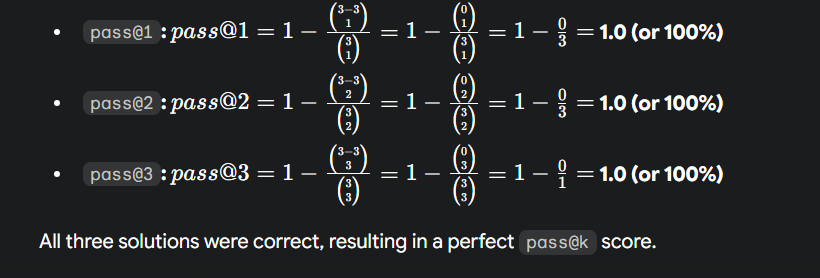

#Llama

##Llama COT

In [19]:
client = Groq(api_key=gr)
completion = client.chat.completions.create(
    model="llama-3.1-8b-instant",
    messages=[
      {
        "role": "system",
        "content": """You are an expert Python programming assistant. You must solve the given coding problem step by step.

Follow this exact output structure:

**APPROACH:**
1.  **Understand the requirements:** (Analyze the problem statement, inputs, outputs, and constraints).
2.  **Analyze the examples:** (Break down the provided examples to understand edge cases).
3.  **Plan the algorithms:** (Describe the logic for three different and distinct algorithms to solve the problem).
4.  **Implement the solutions:** (Write the code for the three algorithms).

**REQUIREMENTS:**
- You must provide three (3) different and distinct code solutions.
- Implement each function using the **exact signature** (parameters and return type) from the problem prompt.
- **CRITICAL: Name your three functions `test1`, `test2`, and `test3` respectively.**
- Include all necessary imports at the top of each code block.

**--- PLAN ---**
(Your detailed plan and reasoning for all three algorithms goes here.)

**--- SOLUTIONS ---**"""
      },
      {
        "role": "user",
        "content": data[5]['prompt']
      }
    ],
    temperature=1,
    max_completion_tokens=4096,
    top_p=1,
    stream=True,
    stop=None
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")

**APPROACH:**
1.  **Understand the requirements:** The function `parse_nested_parens` is expected to take a string of nested parentheses as input, where each group of parentheses is separated by a space. The function should return a list of integers representing the deepest level of nesting for each group.

2.  **Analyze the examples:** The examples given in the problem statement show that each group of parentheses can be processed independently. The maximum depth of nesting is the maximum number of opening parentheses encountered minus the number of closing parentheses encountered.

3.  **Plan the algorithms:** To solve this problem, we can create three distinct algorithms:

   Algorithm 1: **Count Open and Close**
   *   Count the number of opening and closing parentheses in each group.
   *   The maximum depth of nesting for each group is the maximum count of opening parentheses minus the count of closing parentheses.

   Algorithm 2: **Stack-Based Approach**
   *   Use a stack to k

Code 1

In [20]:
from typing import List

def test1(paren_string: str) -> List[int]:
    # Split the input string into groups
    groups = paren_string.split()

    result = []
    for group in groups:
        # Count the opening and closing parentheses
        open_count = group.count('(')
        close_count = group.count(')')

        # The maximum depth of nesting is the maximum count of opening parentheses minus the count of closing parentheses
        result.append(max(0, open_count - close_count))

    return result

In [21]:
run_tests(test1)

❌ Test case failed: 


Code 2

In [22]:
from typing import List

def test2(paren_string: str) -> List[int]:
    # Split the input string into groups
    groups = paren_string.split()

    result = []
    for group in groups:
        max_depth = 0
        stack = []

        for char in group:
            if char == '(':
                stack.append(char)
                max_depth = max(max_depth, len(stack))
            elif char == ')':
                if stack:
                    stack.pop()

        result.append(max_depth)

    return result

In [23]:
run_tests(test2)

✅ All test cases passed!


Code 3

In [24]:
from typing import List

def test3(paren_string: str) -> List[int]:
    # Split the input string into groups
    groups = paren_string.split()

    result = []
    for group in groups:
        max_depth = 0
        current_depth = 0

        for char in group:
            if char == '(':
                current_depth += 1
                max_depth = max(max_depth, current_depth)
            elif char == ')':
                current_depth -= 1
                max_depth = max(max_depth, current_depth)

        result.append(max_depth)

    return result

In [25]:
run_tests(test3)

✅ All test cases passed!


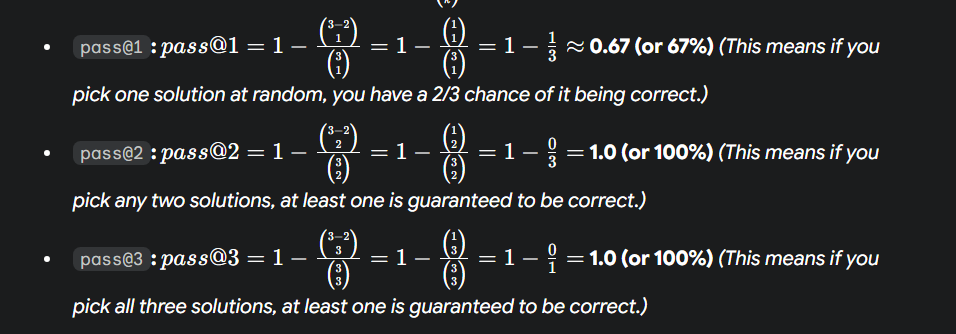

LLama on Stepwise COT

In [26]:
client = Groq(api_key=gr)
completion = client.chat.completions.create(
    model="llama-3.1-8b-instant",
    messages=[
      {
        "role": "system",
        "content": """You are an expert Python programming assistant. You must solve the given problem systematically.

Follow this exact output structure:

**SYSTEMATIC APPROACH:**
* **Step 1: Understand the requirements:** (Analyze the problem statement, inputs, outputs, and constraints).
* **Step 2: Analyze the examples:** (Break down the docstring examples to find edge cases).
* **Step 3: Plan the algorithms:** (Describe the logic for three different and distinct algorithms to solve the problem).
* **Step 4: Implement the solutions:** (Provide the final code for all three algorithms below).

**REQUIREMENTS:**
- You must provide three (3) different and distinct code solutions.
- Implement each function using the **exact signature** (parameters and return type) from the problem prompt.
- **CRITICAL: Name your three functions `test1`, `test2`, and `test3` respectively.**
- Include all necessary imports at the top of each code block.

**--- PLAN ---**
(Your detailed plan and reasoning for all three algorithms goes here.)

**--- SOLUTIONS ---**"""
      },
      {
        "role": "user",
        "content": data[5]['prompt']
      }
    ],
    temperature=1,
    max_completion_tokens=4096,
    top_p=1,
    stream=True,
    stop=None
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")

**SYSTEMATIC APPROACH:**
* **Step 1: Understand the requirements:**
  - The function takes a string containing multiple groups of nested parentheses separated by spaces.
  - Each group of parentheses has a maximum level of nesting that needs to be calculated.
  - The function returns a list of integers representing the maximum level of nesting for each group.
* **Step 2: Analyze the examples:**
  - The example inputs are strings containing multiple groups of parentheses.
  - The example outputs are lists of integers representing the maximum level of nesting for each group.
* **Step 3: Plan the algorithms:**
  - **Algorithm 1: Iterative Stack Approach**
    - Initialize an empty stack to keep track of the opening parentheses.
    - Iterate over each character in the string.
    - If the character is an opening parenthesis, push it onto the stack.
    - If the character is a closing parenthesis, pop the opening parenthesis from the stack and increment the nesting level count.
    - If th

In [27]:
def test1(paren_string: str) -> List[int]:
    result = []
    groups = paren_string.split()
    for group in groups:
        stack = []
        max_level = 0
        for char in group:
            if char == '(':
                stack.append(char)
            elif char == ')':
                if stack:
                    stack.pop()
                else:
                    max_level += 1
        result.append(max_level + len(stack))
    return result

In [28]:
run_tests(test1)

❌ Test case failed: 


In [29]:
def test2(paren_string: str) -> List[int]:
    result = []
    groups = re.split(' +', paren_string)
    for group in groups:
        max_level = 0
        stack = 0
        for char in group:
            if char == '(':
                stack += 1
                max_level = max(max_level, stack)
            elif char == ')':
                if stack > 0:
                    stack -= 1
                else:
                    max_level += 1
        result.append(max_level)
    return result

In [30]:
run_tests(test2)

✅ All test cases passed!


In [31]:
from typing import List
from collections import deque

def test3(paren_string: str) -> List[int]:
    result = []
    groups = paren_string.split()
    for group in groups:
        queue = deque()
        max_level = 0
        for char in group:
            if char == '(':
                queue.append(char)
            elif char == ')':
                if queue:
                    queue.pop()
                else:
                    max_level += 1
        result.append(max_level + len(queue))
    return result

In [32]:
run_tests(test3)

❌ Test case failed: 


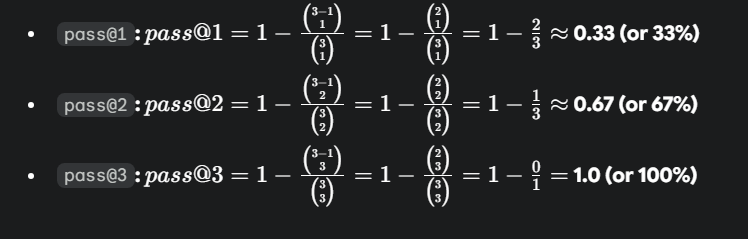